# Dali Classifier

In [1]:
from fastai.vision.all import *

In [2]:
dls = ImageDataLoaders.from_path_func(
    '.',
    get_image_files("./images"),
    parent_label,
    valid_pct=0.2,
    seed=42,
    bs=20,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
learn = vision_learner(dls, resnet34, metrics=error_rate)

/Users/thomas/Work/dali-classifier/.venv/lib/python3.11/site-packages/torch/_tensor.py:1418: UserWarning: The operator 'aten::_linalg_solve_ex.result' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  ret = func(*args, **kwargs)


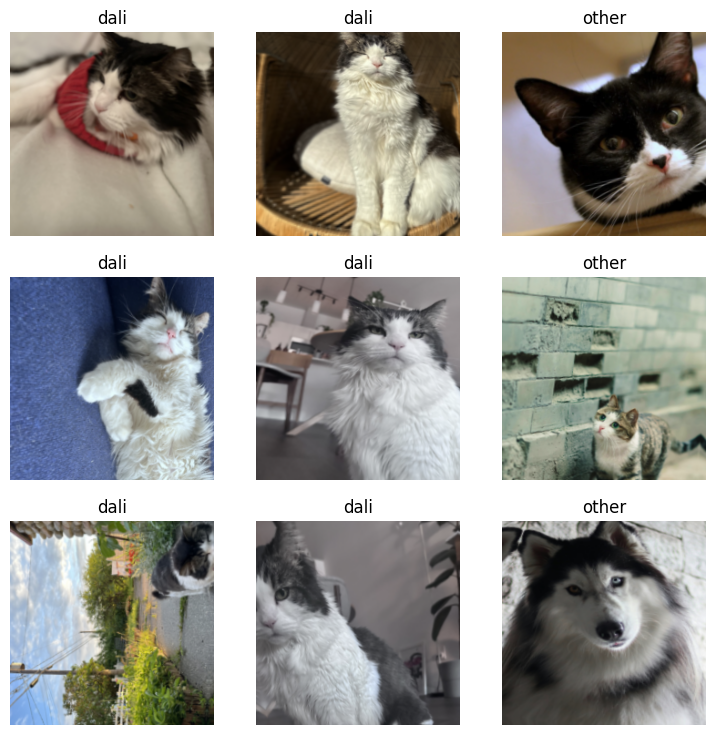

In [10]:
dls.show_batch()

In [11]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0004786300996784121)

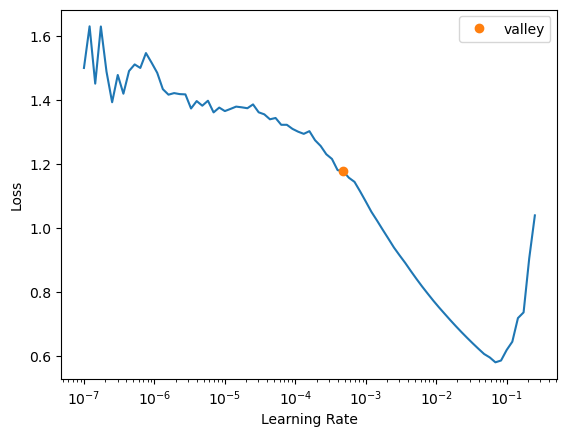

In [12]:
learn.lr_find()

In [12]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.352939,0.595155,0.307692,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.069022,0.322890,0.076923,00:05
1,0.791151,0.314105,0.153846,00:03
2,0.582480,0.331521,0.153846,00:03
3,0.459813,0.372685,0.076923,00:03
4,0.376359,0.391934,0.076923,00:03
5,0.322934,0.367998,0.076923,00:03


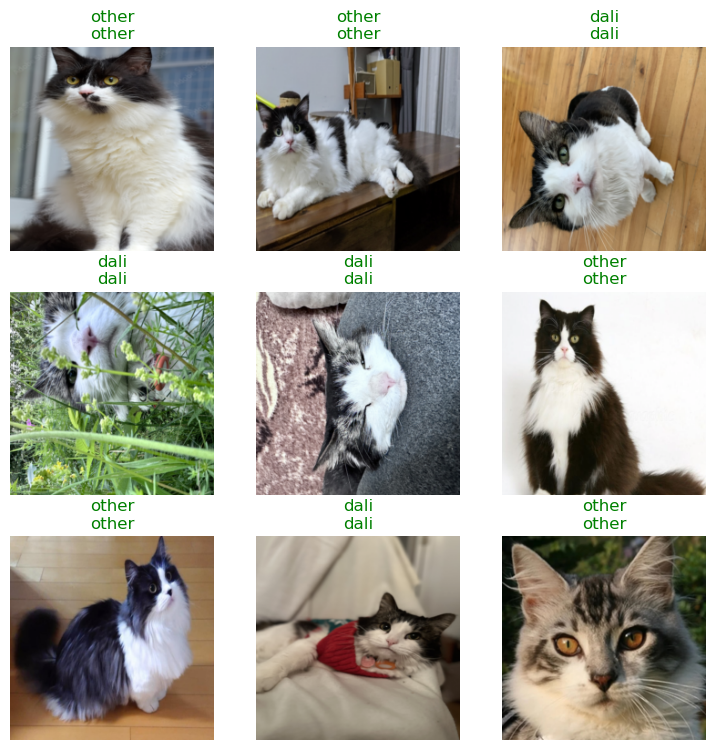

In [24]:
learn.show_results()

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

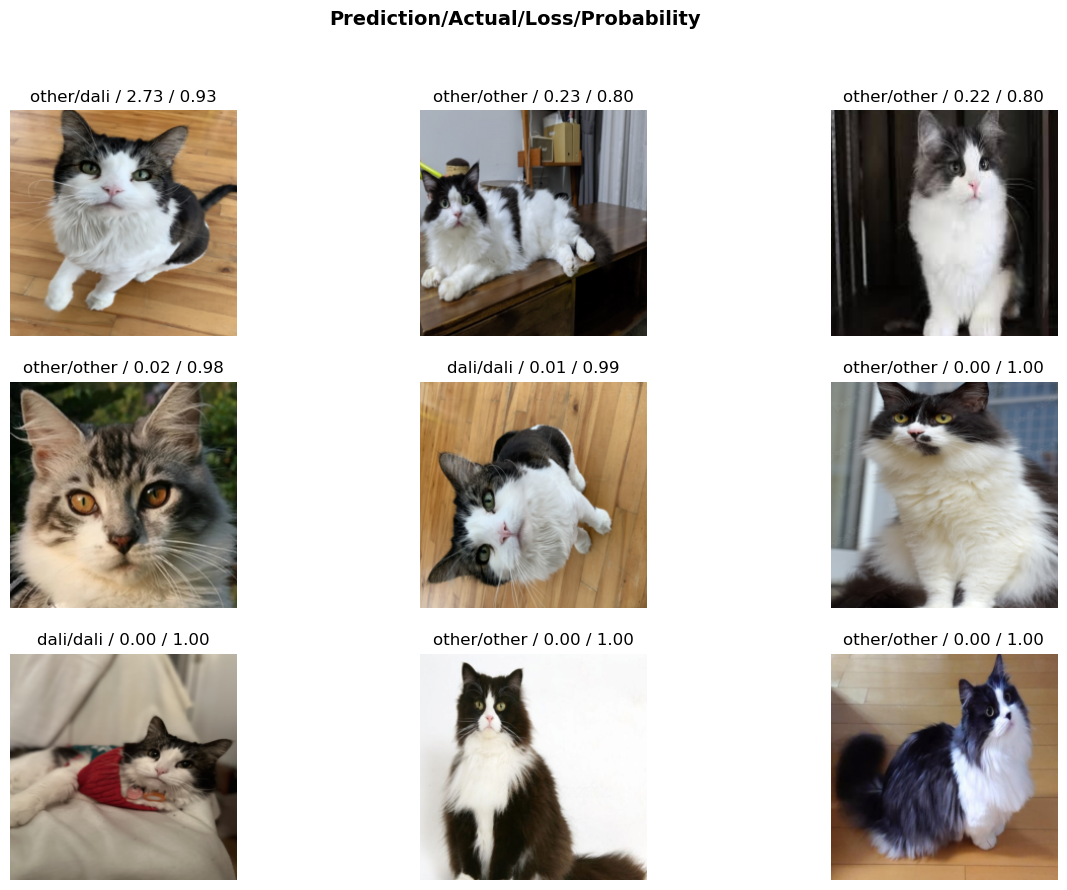

In [26]:
interp.plot_top_losses(9, figsize=(15,10))

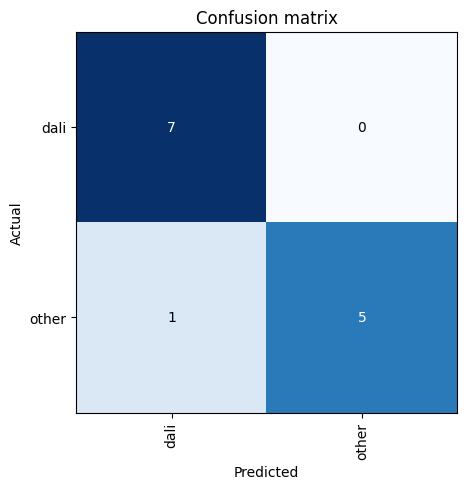

In [14]:
interp.plot_confusion_matrix()

In [28]:
learn.export("model.pkl")